In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib
sys.path.append('.') # point to the root directory
ROOT_DIR = os.path.dirname(os.path.abspath('COMP_9417_23_Project')) # project Directory
data_dir = os.path.join(ROOT_DIR, 'data')
svr_dir = os.path.join(ROOT_DIR, 'svr_searchCV_pkl')

### A: Pre-process Data & Feature Engineering - EDA, Cleaning, Argumentation, Feature reduction and Selection
#### 1. Data Cleaning and Normarlization
Obtained data is clean and scaled, however, given that the ratio of features space to sample size is about 3:1,  argumentation may be applied increase sample size.

In [2]:
# read csv dataset
file = os.path.join(data_dir, 'training.csv')
data_file =  pd.read_csv(file)

#import utility/helper function class
from utils import util
# clean data and drop or replace outliers- set drop_outlers to True to drop or False (default) to replace them
data = util.clean_outliers(data_file, drop_outliers = True )

# set test_split_ratio =0.0 ( X_test and y_test becomes None) when preparing for Final Submission Otherwise set to (0.1 or 0.2): default-0.2
X_train, X_test, y_train, y_test = util.prepare_data(data, test_split_ratio=0.2)


Cleaning data with outliers dropped
Done!

Data preparation in progress...
Completed!


#### 2. Feature Reduction/Selection

##### 2.1. PCA

In [3]:
# >>> PCA <<<
# import Feature Transformation class FS from file feature_select.py
from feature_select import FS
pca, top_features = FS.pca(X_train, explain_threshold=0.99)

In [4]:
# transform the pca tranform X_train and X_test in ndarry pca versions
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
print(np.sum(pca.explained_variance_ratio_))
PCA_matrix = pd.DataFrame(np.abs(pca.components_), columns=X_train.columns,
                          index=['PC-'+str(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)])

# create a pd.DataFrame of of the pca version of X_train and X_test as train_pca and test_pca
train_pca = pd.DataFrame(X_train_pca, columns=['PC-'+str(i) for i in range(1, X_train_pca.shape[1]+1)], 
                        index=[i for i in range(X_train_pca.shape[0])])
test_pca = pd.DataFrame(X_test_pca, columns=['PC-'+str(i) for i in range(1, X_test_pca.shape[1]+1)])

0.9912903310411241


##### 2.2 Correlation Analyais:

In [7]:
#>>> Correlation Analysis <<<
# import Feature Transformation class FS from file feature_select.py
from feature_select import FS

# get filtered pearson and spearman corr feature sets for all response variable with >= 0.1 corr coef
pearson, spearman = FS.pearson_corr_filtered(X_train, y_train, 0.1), FS.spearman_corr_filtered(X_train, y_train, 0.1)


Runing Pearson correlation for important features with correlations > 0.1 ...

3536 features selected for target: Ca
885 features selected for target: P
1323 features selected for target: pH
3563 features selected for target: SOC
3535 features selected for target: Sand
Performance: 165.29 seconds

Runing Pearson correlation for important features above 0.1 threshold...

3520 features selected for target: Ca
1473 features selected for target: P
1528 features selected for target: pH
3562 features selected for target: SOC
3534 features selected for target: Sand
Performance: 145.82 seconds


##### 2.2.1: Plots showing Correlations btw predictors and response variable 

NameError: name 'features' is not defined

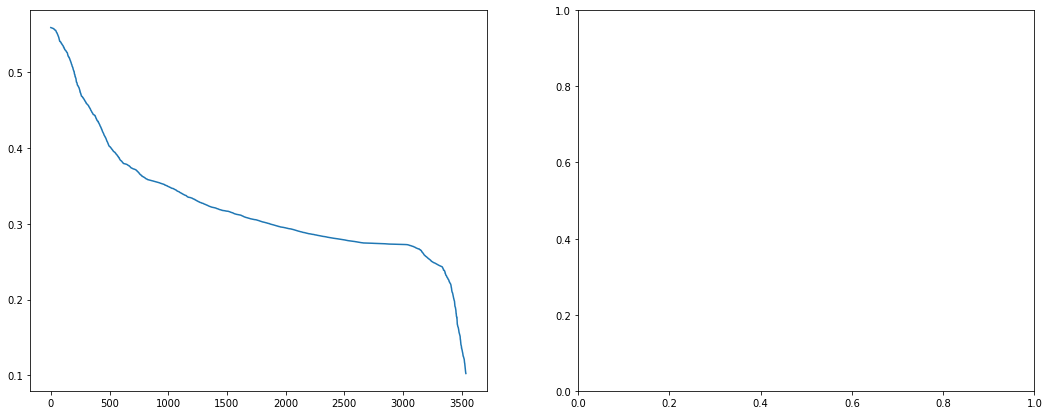

In [9]:
labels = list(y_train.columns)

# highlight/capture the relationship that exist between response variables
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# cor_features = [person, spearman]
for k in pearson.keys():
    ax[0].plot(range(len(pearson[k].index)), pearson[k].values)
    ax[0].legend(pearson.keys())
    ax[0].set_title('Pearson correlation \nBetween each response variable and all other possible predictors')
    ax[0].set_ylabel('Correlation Coefs')
    ax[0].set_xlabel('\nTop important features for Coef > 0.1')
    
for k in spearman.keys():
    ax[1].plot(range(len(spearman[k].index)), spearman[k].values)
    ax[1].legend(spearman.keys())
    ax[1].set_title('Spearman correlation \nBetween each response variable and all other possible predictors')
    ax[1].set_ylabel('Correlation Coefs')
    ax[1].set_xlabel('\nTop important features for Coef > 0.1')

plt.savefig('corr.png', dpi=300, bbox_inches='tight')
plt.show()

### B: Modeling
#### 3. Hyperparameter Tuning
##### 3.1. GridSearchCV methods + Search parameters and results imported + Tables to show results + validation plots

In [20]:
# Grid search completed and the pickle files imported
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
labels = list(y_train.columns)

##### 3.2. Models: Best parameters applied to build models + Model fit, Prediction + Train & test errors + Plots

**On Original Data**

**On PCA Transformed Data**


In [11]:
# Using PCA transformed Data
model2 = svm.SVR(C= 10000.0, coef0=0.01, degree=3, gamma="auto", kernel='poly')
y_hat2 = np.zeros(y_train.shape)
y_pred2 = np.zeros(y_test.shape)

y =np.array(y_train)
y_=np.array(y_test)

model2.fit(X_train_pca, y[:, 0])
model2s=[]
for i in range(5):
    mod = model2
    model2s.append(mod.fit(X_train_pca, y[:, i]).predict(X_train_pca))
   

SVR(C=10000.0, coef0=0.01, gamma='auto', kernel='poly')

In [15]:
er1 = mean_squared_error(y_[:, 0], y_pred2[:, 0], squared=False)
er1

0.4982482917147992

In [ ]:
# gbr_grid_search.fit(X_train_select, Y_train)
# best_model = gbr_grid_search.best_estimator_
# sorted_idx = best_model.feature_importances_.argsort()
# plt.barh(best_model.feature_names_in_[sorted_idx], best_model.feature_importances_[sorted_idx])
# plt.xlabel("Random forest feature importance")
# plt.show()

In [ ]:
# cols= X_train.columns[top_features]
# X_train[cols]
y_train.boxplot(column=list(y_train.columns), figsize=(18,10))
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')

In [ ]:
import seaborn as sns
sns.pairplot(y_train, kind='reg')
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')

In [ ]:
sns.pairplot(X_no_outliers[list(X_no_outliers.columns[3585:3593])], kind='reg')

In [ ]:
xx.boxplot(column=list(xx.columns[3580:3585]), figsize=(18,10))

In [ ]:

# plt.figure(figsize =(15,5))
# plt.subplot(1,2,1)
# sns.lineplot(x=df['Job Start Date'], y=df['Rate in Rs./Kg.'], color='r')
# plt.title("Steel Scrap Rate (Rs/Kg)", fontsize=20)
# plt.xlabel('Date')
# plt.subplot(1,2,2)
# sns.lineplot(x=df['Job Start Date'], y=df['Scrape Sale Qty.'], color='b')
# plt.title("Steel Scrap Weight (Rs/Kg)", fontsize=20)
# plt.xlabel('Date')

In [8]:
file = os.path.join(data_dir, 'sorted_test.csv')
test_df=pd.read_csv(file)

In [21]:
svr_data_dir = os.path.join(ROOT_DIR, 'svr_searchCV_pkl')

ca = joblib.load(os.path.join(svr_data_dir, 'svr_P.pkl'))
from sklearn import svm
model = svm.SVR(**ca.best_params_)
X= np.array(X_train)
y = np.array(y_train)
model.fit(X, y[:,1])
ca_pred = model.predict(X_test)

In [22]:
y_ =np.array(y_test)


In [23]:
error= mean_squared_error(y_[:,1], ca_pred, squared=False)
error

0.17373615636026027